In [253]:
import pandas as pd
from pathlib import Path

path = Path.cwd()
path = str(path)+'/GFMS DB/'
path

'/Users/keumhyeonjun/Projects/행안부/자재/GFMS DB/'

In [254]:
FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')

FMSA11_작업장비이력 = pd.read_excel(path + 'FMSA11_작업장비이력.xlsx')

FMSX05_장비마스터 = pd.read_csv(path + 'FMSX05_장비마스터_ver2.csv')

FMSB07_자재출고 = pd.read_excel(path + 'FMSB07_자재출고.xlsx')

FMSB03_자재마스터 = pd.read_csv(path + 'FMSB03_자재마스터_ver2.csv')

FMSB03_자재마스터.drop(['class_nm_4','class_cd_4'],axis =1,inplace = True)

FMSB03_자재마스터.rename(columns={'class_nm_3':'jajae_class_nm_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_2':'jajae_class_nm_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_nm_1':'jajae_class_nm_1'},inplace = True)

FMSB03_자재마스터.rename(columns={'class_cd_3':'jajae_class_cd_3'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_2':'jajae_class_cd_2'},inplace = True)
FMSB03_자재마스터.rename(columns={'class_cd_1':'jajae_class_cd_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_nm_4':'jangbi_class_nm_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_3':'jangbi_class_nm_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_2':'jangbi_class_nm_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_nm_1':'jangbi_class_nm_1'},inplace = True)


FMSX05_장비마스터.rename(columns={'class_cd_4':'jangbi_class_cd_4'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_3':'jangbi_class_cd_3'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_2':'jangbi_class_cd_2'},inplace = True)
FMSX05_장비마스터.rename(columns={'class_cd_1':'jangbi_class_cd_1'},inplace = True)

FMSA10_작업지시_결과.rename(columns={'class_nm_4':'job_class_nm_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_3':'job_class_nm_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_2':'job_class_nm_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_nm_1':'job_class_nm_1'},inplace = True)


FMSA10_작업지시_결과.rename(columns={'class_cd_4':'job_class_cd_4'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_3':'job_class_cd_3'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_2':'job_class_cd_2'},inplace = True)
FMSA10_작업지시_결과.rename(columns={'class_cd_1':'job_class_cd_1'},inplace = True)

fmsa10 =FMSA10_작업지시_결과[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4']]
fmsb03 = FMSB03_자재마스터[['mat_cd','mat_nm','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]
fmsx05 = FMSX05_장비마스터[['fac_cd','fac_nm','jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4']]


FMSB07_자재출고["mat_cd"] = FMSB07_자재출고["mat_cd"].astype("str")
FMSB07_자재출고["mat_cd"] = list(map(lambda x: x[:-3],FMSB07_자재출고["mat_cd"].tolist())) # FMSB03과 inner join하기 위해 mat_cd 형식 일치
fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")
jajae = pd.merge(FMSB07_자재출고,fmsb03 ,on = 'mat_cd', how = 'inner')
jajae = jajae[['job_cd','outw_day','mat_cd','outw_qty','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]


jangbi = pd.merge(FMSA11_작업장비이력, fmsx05, how='inner', on='fac_cd')
data = pd.merge(fmsa10,jangbi, on='job_cd',how = 'inner')

data['자재매칭여부'] = data['job_cd']
arr_장비 = list(data['job_cd'])
arr_자재 = list(jajae['job_cd'])
#자재 매칭이 안되는 경우
arr = list(set(arr_장비)- set(arr_자재))

def function(x):
    if x in arr:
        return 0
    else:
         return 1

data['자재매칭여부'] = data['자재매칭여부'].apply(function)
df = pd.merge(data,jajae, on='job_cd',how = 'inner')

final = df[['job_cd','job_nm','job_jisi_dt','job_enddt','job_shm','job_ehm','job_class_nm_1','job_class_nm_2','job_class_nm_3','job_class_nm_4','fac_cd','fac_nm','mat_cd','mat_nm_x',
           'jangbi_class_nm_1','jangbi_class_nm_2','jangbi_class_nm_3','jangbi_class_nm_4','자재매칭여부','mat_nm_x','jajae_class_nm_1','jajae_class_nm_2','jajae_class_nm_3','jajae_class_cd_3']]

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71833/4185094747.py:1: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  FMSA10_작업지시_결과 = pd.read_csv(path+'FMSA10_작업지시_결과_ver2.csv')
/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_71833/4185094747.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmsb03["mat_cd"] = fmsb03["mat_cd"].astype("str")


In [255]:
final.head()

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,자재매칭여부,mat_nm_x,jajae_class_nm_1,jajae_class_nm_2,jajae_class_nm_3,jajae_class_cd_3
0,211001-00059,4동 지하 1층 전기원휴게실내 샤워장 전등점등불량.,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오전 9:30:00,4동,지하1층,조명,옥내 LED 조명,...,전기,전력부하설비,조명,옥내 LED 조명,1,LED일체형램프,전기,조명기구/전등/안정기,LED 전구,413002
1,211001-00081,1동 1구역 2층 복도내 거실통로유도등 점등불량 교체 작업,2021-10-01,2021-10-01,2021-10-01 오후 1:30:00,2021-10-01 오후 1:45:00,1동 1구역,2층,유도등,거실통로 유도등,...,방재,피난설비,유도등,거실통로 유도등,1,거실통로유도등(LED),소방,피난설비,유도등,504001
2,211001-00070,2-1동 옥상층 66번 CCTV PTZ 동작 불량,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오후 5:31:00,2동 1구역,옥상층,방범시스템,CCTV 카메라,...,통신,방범설비,방범시스템,CCTV 카메라,1,IP카메라,방범,영상감지장치,CCTV,802001
3,211001-00070,2-1동 옥상층 66번 CCTV PTZ 동작 불량,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오후 5:31:00,2동 1구역,옥상층,방범시스템,CCTV 카메라,...,통신,방범설비,방범시스템,CCTV 카메라,1,절연테이프,전기,절연재료,테이프,407001
4,211001-00062,9동 701호해양수산사이버안전센터 분말소화기 받침대 노후로 신품교체.,2021-10-01,2021-10-01,2021-10-01 오후 3:30:00,2021-10-01 오후 4:09:00,9동,7층,소화기구,이동식,...,방재,소화설비,소화기구,이동식,1,소화기받침대,소방,소화기구,소화기구부품,505009


In [256]:
data.head()

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,chg_sysdt,input_emp_no,chg_emp_no,input_scr_nm,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,자재매칭여부
0,211001-00047,2동 1구역 430호 남자화장실 비데 전열불량,2021-10-01,2021-10-01,2021-10-01 오후 2:30:00,2021-10-01 오후 2:40:00,2동 1구역,4층,분전반,EPS실,...,NaN,crowonthetree,NaN,JOB_A11,LN-4E1(E),전기,전력공급설비,분전반,EPS실,0
1,211001-00059,4동 지하 1층 전기원휴게실내 샤워장 전등점등불량.,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오전 9:30:00,4동,지하1층,조명,옥내 LED 조명,...,NaN,dlawowls100,NaN,JOB_A11,4동 지하1층 조명기구,전기,전력부하설비,조명,옥내 LED 조명,1
2,211001-00037,4동 608호 정책조정기획관실 전등 점등 불량,2021-10-01,2021-10-01,2021-10-01 오후 2:25:00,2021-10-01 오후 3:25:00,4동,6층,조명,옥내 LED 조명,...,NaN,Jk1495,NaN,JOB_A11,4동 6층 조명기구,전기,전력부하설비,조명,옥내 LED 조명,0
3,211001-00081,1동 1구역 2층 복도내 거실통로유도등 점등불량 교체 작업,2021-10-01,2021-10-01,2021-10-01 오후 1:30:00,2021-10-01 오후 1:45:00,1동 1구역,2층,유도등,거실통로 유도등,...,NaN,skysen83,NaN,JOB_A11,1동 거실통로 유도등,방재,피난설비,유도등,거실통로 유도등,1
4,211001-00070,2-1동 옥상층 66번 CCTV PTZ 동작 불량,2021-10-01,2021-10-01,2021-10-01 오전 9:00:00,2021-10-01 오후 5:31:00,2동 1구역,옥상층,방범시스템,CCTV 카메라,...,NaN,hugh7192,NaN,JOB_A11,2동 CCTV #66,통신,방범설비,방범시스템,CCTV 카메라,1


## 장애가 많은 구역 조회

In [257]:
data['job_class_nm_1'].value_counts()

7-2동            667
16동             648
13-1동           475
17-2동           403
7-1동            351
11-1동           318
8-1동            307
옥외체육시설          278
10-1동           277
17-1동           195
4동              188
9동              186
17-3동           166
14-1동           159
15-2동           129
SCC전시동          128
13-2동           121
6동 2구역          119
11-2동           105
1동 2구역           99
14-2동            94
15-1동            90
2동 1구역           83
12-3동            78
복합편의시설 주차1동      75
복합편의시설 주차2동      73
13-3동            70
1동 1구역           67
6동 3구역           63
5동 2구역           61
복합편의시설 주차4동      57
2동 2구역           53
14-3동            53
3동               52
꿈샘 어린이집          48
12-2동            46
1동 3구역           43
10-2동            41
6동 1구역           40
5동 1구역           36
SCC지원동           35
SCC홍보동           33
5동 3구역           29
경비대              27
안내동              27
아이세상어린이집         21
솔비타어린이집          21
차오름 어린이집         17
복합편의시설 주차3동      16
라온 어린이집          14


## 장애가 많은 장비 조회

In [258]:
# 계층레벨4
data['jangbi_class_nm_4'].value_counts()

소변기           488
세면대 수전        462
대변기           432
냉각탑           349
개별냉난방기 실내기    309
             ... 
조명제어            1
캐비넷             1
통신(방송)실         1
기타설비            1
쓰레기 이송설비        1
Name: jangbi_class_nm_4, Length: 155, dtype: int64

In [259]:
#계층레벨3
data['jangbi_class_nm_3'].value_counts()

위생설비         1692
출입통제시스템       516
열원설비          506
개별냉난방설비       473
분전반           414
방범시스템         413
공조설비          357
MRL           287
유도등           285
펌프설비          276
조명            246
자동화재탐지설비      187
환기설비          159
탱크설비          134
MR            108
소화기구          100
주방시설           72
스프링클러설비        66
부속시설           64
예비전원           47
원격감시           41
로프식            33
내벽마감재          30
구내방송시스템        27
기타             24
홍보시스템          22
자동제어설비         20
방호, 안전시설       20
수배전반           20
소방선로           19
소화펌프           18
비상경보설비         16
조경시설           13
방화셔터설비         12
네트워크시스템        12
동력반            11
소화가스설비         10
소화전설비          10
소화수조            9
영상, 음향시스템       7
덤웨이터            7
감시반             7
MCC반            6
배연창             6
제연설비            4
기타시스템           4
신재생에너지          4
비상조명등           3
피난기구            3
에스컬레이터          2
원격제어            2
통합SI시스템         2
휠체어리프트          2
기타시설            1
배관설비            1
유압식       

In [260]:
소변기 = fmsx05[fmsx05['jangbi_class_nm_4'] == '소변기']

## 장비분석

In [261]:
소변기

,fac_cd,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4
8,200201020387,(컨홍)소-B1(남)P118호-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기
439,200201020002,(1)소-1-B1(남)B28-화장실)(소산실) 소변기 1,기계,"위생, 탱크설비",위생설비,소변기
440,200201020001,(1)소-1-B1(남)B12-화장실)(소산실) 소변기 1,기계,"위생, 탱크설비",위생설비,소변기
704,200201020005,(1)소-1-1F(남)110호로비-화장실) 소변기 5,기계,"위생, 탱크설비",위생설비,소변기
937,200201020008,(1)소-1-2F(남)217호-화장실) 소변기 3,기계,"위생, 탱크설비",위생설비,소변기
...,...,...,...,...,...,...
40037,200201020351,(컨전)소-2F(남)223호옆-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기
40038,200201020331,(컨전)소-2F(남)207호옆-화장실) 소변기 3대,기계,"위생, 탱크설비",위생설비,소변기
40239,200201020356,(컨전)소-3F(남)307호옆-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기
40391,200201020358,(컨전)소-4F(남)433앞-화장실) 소변기 4대,기계,"위생, 탱크설비",위생설비,소변기


In [262]:
소변기_장애 =data[data['jangbi_class_nm_4']=='소변기']

In [264]:
소변기_장애 = 소변기_장애.sort_values('job_jisi_dt')
소변기_장애

,job_cd,job_nm,job_jisi_dt,job_enddt,job_shm,job_ehm,job_class_nm_1,job_class_nm_2,job_class_nm_3,job_class_nm_4,...,chg_sysdt,input_emp_no,chg_emp_no,input_scr_nm,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,자재매칭여부
10,211001-00017,"9동 5-2, 5-4 남자 화장실 소변기 물이 약함",2021-10-01,2021-10-01,2021-10-01 오후 1:10:00,2021-10-01 오후 1:40:00,9동,5층,위생설비,소변기,...,NaN,nodong1,NaN,JOB_A11,9동-5F-2 화장실(남) 소변기,기계,"위생, 탱크설비",위생설비,소변기,0
12,211001-00033,13-1동 4-6 남자화장실 소변기 물 안나옴,2021-10-01,2021-10-01,2021-10-01 오후 1:30:00,2021-10-01 오후 2:30:00,13-1동,4층,위생설비,소변기,...,NaN,jyz6110,NaN,JOB_A11,소변기 #20,기계,"위생, 탱크설비",위생설비,소변기,0
13,211001-00034,13-1동 6-6 남자화장실 소변기 물 안나옴,2021-10-01,2021-10-01,2021-10-01 오전 9:30:00,2021-10-01 오전 10:30:00,13-1동,6층,위생설비,소변기,...,NaN,jyz6110,NaN,JOB_A11,소변기 #29,기계,"위생, 탱크설비",위생설비,소변기,0
58,211005-00028,14동 4-8 남자화장실 소변기 막힘 약품 처리 작업,2021-10-05,2021-10-05,2021-10-05 오후 2:35:00,2021-10-05 오후 3:35:00,14-2동,4층,위생설비,소변기,...,NaN,31abcd,NaN,JOB_A11,14동-4F-8 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,1
59,211005-00014,15-1동 2-8 남자화장실 소변기 건전지 교체 작업,2021-10-05,2021-10-05,2021-10-05 오전 9:30:00,2021-10-05 오전 10:00:00,15-1동,2층,위생설비,소변기,...,NaN,31abcd,NaN,JOB_A11,15동-2F-8 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6792,221007-00001,"8동 3층 남자화장실 두번째,세번째 소변기 물 안내감",2022-10-07,2022-10-07,2022-10-07 오전 9:20:00,2022-10-07 오전 9:55:00,8-1동,3층,위생설비,소변기,...,NaN,6ehd9627,NaN,JOB_A11,8동-3F-1 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,1
6793,221007-00018,9동 4-2 남자화장실 소변기 누수되어 전자밸브 수리함,2022-10-07,2022-10-07,2022-10-07 오후 1:05:00,2022-10-07 오후 1:50:00,9동,4층,위생설비,소변기,...,NaN,4heaven,NaN,JOB_A11,9동-4F-2 화장실(남) 소변기,기계,"위생, 탱크설비",위생설비,소변기,0
6810,221007-00025,17-2동 6층 남자화장실 소변기 2대 물 양 적음,2022-10-07,2022-10-07,2022-10-07 오후 1:25:00,2022-10-07 오후 1:40:00,17-2동,6층,위생설비,소변기,...,NaN,golfman1999,NaN,JOB_A11,6F남2소변기(1),기계,"위생, 탱크설비",위생설비,소변기,0
6822,221011-00037,11동 1-2 남자화장실 소변기 물 안나옴,2022-10-11,2022-10-11,2022-10-11 오전 9:50:00,2022-10-11 오전 10:10:00,11-1동,1층,위생설비,소변기,...,NaN,4heaven,NaN,JOB_A11,11동-1F-2 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,1


In [265]:
fac_list = []
date_list =[]

for i in range(len(소변기_장애)):
    fac = 소변기_장애['fac_cd'].iloc[i]
    date = 소변기_장애['job_jisi_dt'].iloc[i]
    if fac not in fac_list:
        fac_list.append(fac)
        date_list.append(date)


In [266]:
len(fac_list)

221

In [267]:
소변기2 = pd.DataFrame({'fac_cd' :fac_list,
                     '작업일자' : date_list})
소변기2

,fac_cd,작업일자
0,200201020248,2021-10-01
1,200201020044,2021-10-01
2,200201020055,2021-10-01
3,200201020487,2021-10-05
4,200201020516,2021-10-05
...,...,...
216,200201020419,2022-09-29
217,200201020355,2022-10-05
218,200201020025,2022-10-05
219,200201020246,2022-10-07


In [268]:

# 2021-10-01 ~ 2022-10-11
# 기준일자 = 2022-10-11
urinal = pd.merge(소변기,소변기2, on ='fac_cd', how ='left')
urinal['작업일자'] = urinal['작업일자'].fillna('2022-10-11')

In [269]:
import datetime
urinal['작업일자'] = pd.to_datetime(urinal['작업일자'])
time = datetime.datetime(2021,10,1)
urinal['time_delta']= urinal['작업일자']-time
urinal['time_delta'] = urinal['time_delta'].astype(str)
urinal['status'] = urinal['time_delta']

def status(df):
    if df['time_delta'] == '375 days':
        return 0
    else :
        return 1
def slicing(x):
    return x[:-4]

urinal['status'] =urinal.apply(status,axis=1)
urinal['time_delta'] = urinal['time_delta'].apply(slicing)
urinal['time_delta'] = urinal['time_delta'].astype(int)
urinal


,fac_cd,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,작업일자,time_delta,status
0,200201020387,(컨홍)소-B1(남)P118호-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
1,200201020002,(1)소-1-B1(남)B28-화장실)(소산실) 소변기 1,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
2,200201020001,(1)소-1-B1(남)B12-화장실)(소산실) 소변기 1,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
3,200201020005,(1)소-1-1F(남)110호로비-화장실) 소변기 5,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
4,200201020008,(1)소-1-2F(남)217호-화장실) 소변기 3,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
...,...,...,...,...,...,...,...,...,...
559,200201020351,(컨전)소-2F(남)223호옆-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
560,200201020331,(컨전)소-2F(남)207호옆-화장실) 소변기 3대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
561,200201020356,(컨전)소-3F(남)307호옆-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
562,200201020358,(컨전)소-4F(남)433앞-화장실) 소변기 4대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0


# 소변기가 고장나기 전까지의 일수

In [270]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [271]:
urinal.sort_values(by='time_delta', ascending=True)

,fac_cd,fac_nm,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,작업일자,time_delta,status
310,200201020055,소변기 #29,기계,"위생, 탱크설비",위생설비,소변기,2021-10-01,0,1
304,200201020044,소변기 #20,기계,"위생, 탱크설비",위생설비,소변기,2021-10-01,0,1
193,200201020248,9동-5F-2 화장실(남) 소변기,기계,"위생, 탱크설비",위생설비,소변기,2021-10-01,0,1
448,200201020292,1F남3소변기(장),기계,"위생, 탱크설비",위생설비,소변기,2021-10-05,4,1
349,200201020487,14동-4F-8 화장실(남)소변기,기계,"위생, 탱크설비",위생설비,소변기,2021-10-05,4,1
...,...,...,...,...,...,...,...,...,...
183,200201020258,9동-3F-2 화장실(남)장애인 소변기,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
182,200201020255,9동-3F-4 화장실(남)장애인 소변기,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
181,200201020254,9동-2F-2 화장실(남)장애인 소변기,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0
117,200201020233,(6)소-3-3F(남)365호옆-화장실) 소변기 2대,기계,"위생, 탱크설비",위생설비,소변기,2022-10-11,375,0


<AxesSubplot:xlabel='timeline'>

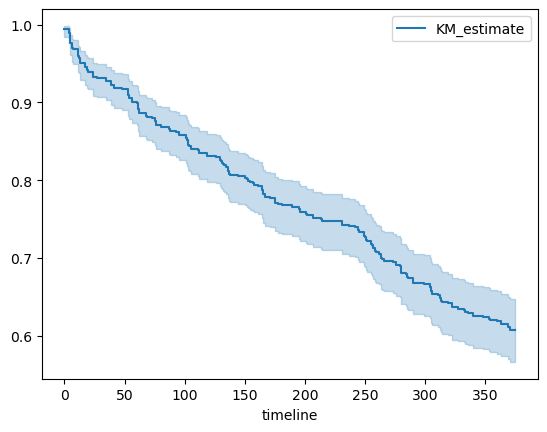

In [272]:
kmf.fit(durations=urinal['time_delta'], event_observed=urinal['status'])
kmf.plot_survival_function()

In [279]:
arr = []
for i in range(0,376):
    print(f'{i}일 후 고장날 확률 :' ,1-kmf.predict(i))

0일 후 고장날 확률 : 0.005319148936170914
1일 후 고장날 확률 : 0.005319148936170914
2일 후 고장날 확률 : 0.005319148936170914
3일 후 고장날 확률 : 0.005319148936170914
4일 후 고장날 확률 : 0.01063829787234094
5일 후 고장날 확률 : 0.023049645390070927
6일 후 고장날 확률 : 0.030141843971631554
7일 후 고장날 확률 : 0.03191489361702149
8일 후 고장날 확률 : 0.03191489361702149
9일 후 고장날 확률 : 0.03191489361702149
10일 후 고장날 확률 : 0.03191489361702149
11일 후 고장날 확률 : 0.040780141843972384
12일 후 고장날 확률 : 0.04255319148936165
13일 후 고장날 확률 : 0.04964539007092239
14일 후 고장날 확률 : 0.04964539007092239
15일 후 고장날 확률 : 0.04964539007092239
16일 후 고장날 확률 : 0.04964539007092239
17일 후 고장날 확률 : 0.05496453900709275
18일 후 고장날 확률 : 0.05496453900709275
19일 후 고장날 확률 : 0.05851063829787262
20일 후 고장날 확률 : 0.060283687943262776
21일 후 고장날 확률 : 0.060283687943262776
22일 후 고장날 확률 : 0.060283687943262776
23일 후 고장날 확률 : 0.060283687943262776
24일 후 고장날 확률 : 0.06737588652482274
25일 후 고장날 확률 : 0.06737588652482274
26일 후 고장날 확률 : 0.06737588652482274
27일 후 고장날 확률 : 0.06914893617021323
28일 후 고장날 확률 : 0.06

In [281]:
FMSX05_장비마스터

,Unnamed: 0,comp_cd,fac_cd,fac_nm,class_cd,dept_cd,fac_model,fac_spec,fac_plc,bd_cd,...,chk_edit_dt,law_fac_yn,jangbi_class_nm_1,jangbi_class_nm_2,jangbi_class_nm_3,jangbi_class_nm_4,jangbi_class_cd_1,jangbi_class_cd_2,jangbi_class_cd_3,jangbi_class_cd_4
0,0,SEJO,200201040293,(3)세-1F-0(여)로비-화장실) 세면대 2대,20020104,10201,자동(2)/수동(0),청소수전,(여)로비,NaN,...,NaN,N,기계,"위생, 탱크설비",위생설비,세면대 수전,20,2002,200201,20020104
1,1,SEJO,200201010257,9F여1대변기(5),20020101,10201,CC-113(바닥형),690*395*435,여-1(동) 화장실,NaN,...,NaN,N,기계,"위생, 탱크설비",위생설비,대변기,20,2002,200201,20020101
2,2,SEJO,200202030001,우수조#1,20020203,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,"위생, 탱크설비",탱크설비,우수 저장조,20,2002,200202,20020203
3,3,SEJO,200105080599,배기휀#76(EF-504),20010508,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,공기조화설비,환기설비,환기팬,20,2001,200105,20010508
4,4,SEJO,200202010001,시수조#1,20020201,10201,NaN,NaN,NaN,NaN,...,NaN,N,기계,"위생, 탱크설비",탱크설비,상수 저장조,20,2002,200202,20020201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40806,40806,SEJO,700101020004,SCC 4호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40807,40807,SEJO,700101020005,SCC 5호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40808,40808,SEJO,700101020006,SCC 6호기 권상기,70010102,10302,HS250K,12*6,NaN,SJ-SCJS-01,...,NaN,N,승강기,승객용,MR,권상기,70,7001,700101,70010102
40809,40809,SEJO,700201010010,SCC 7호기 제어반,70020101,10302,DZDLE-4300,NaN,NaN,SJ-SCJS-01,...,NaN,N,승강기,화물용,로프식,제어반,70,7002,700201,70020101


In [1]:
print(s

SyntaxError: unexpected EOF while parsing (2510871323.py, line 1)